In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import csv
import cv2
import os
from numpy import genfromtxt
import requests
import re
import tensorflow as tf
from tensorflow import keras 
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

In [9]:
def CSV_To_Dataframe(letter, start, end, step):
    path = "./ASL_64/train/"
    data = []
    for num in range(start, end, step):
        df = pd.read_csv(path+letter+'/'+letter+str(num)+'.csv',sep=',',header= None)
        array = df.to_numpy()
        result = array.flatten()
        
        arr = []
        for x in result:
            replaced = re.sub("[^0-9 ]+", "", x)
            replaced = re.sub(' +', ' ', replaced).strip()
            replaced = replaced.split(" ")
            replaced = [(eval(i)/255) for i in replaced]
            arr.append(replaced)
        
        data.append(arr)
    np_data = np.array(data)
    return np_data

In [2]:
letter_to_num = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
    'd' : 4,
    'e' : 5,
    'f' : 6,
    'g' : 7,
    'h' : 8,
    'i' : 9,
    'j' : 10,
    'k' : 11,
    'l' : 12,
    'm' : 13,
    'n' : 14,
    'o' : 15,
    'p' : 16,
    'q' : 17,
    'r' : 18,
    's' : 19,
    't' : 20,
    'u' : 21,
    'v' : 22,
    'w' : 23,
    'x' : 24,
    'y' : 25,
    'z' : 26,
}

In [10]:
def create_data(letters, start, end):
    data = np.concatenate([CSV_To_Dataframe(x, start, end) for x in letters])
    labels = []
    for letter in letters:
        labels = labels + ([[letter_to_num[letter]]]*(end-start))
    labels = np.array(labels)
    return data, labels

master_df, master_labels = create_data("abcdefghijklmnopqrstuvwxyz", 1, 3001) 
#test_df, test_labels = create_data("abcdefghijklmnopqrstuvwxyz", 501, 751)

MemoryError: Unable to allocate 916. MiB for an array with shape (3000, 200, 200) and data type float64

In [38]:
print(master_df.shape)
print(test_df.shape)
""" master_labels = []
test_labels = []
for i in range(1,27):
    for j in range(100):
        test_labels.append(i) """
test_labels = np.array(test_labels)
 
print(test_labels.shape)
""" for i in range(1,27):
    for j in range(200):
        master_labels.append(i)
master_labels = np.array(master_labels) """

print(master_labels.shape)
print(test_labels)


(52000, 64, 64)
(26000, 64, 64)
(26000,)
(52000,)
[ 1  1  1 ... 26 26 26]


In [2]:
master1 = np.load("master_numpy_1_300.npy", allow_pickle = True)
test1 = np.load("test_numpy_1_300.npy", allow_pickle = True)
master_labels1 = np.load("master_labels_numpy_1_300.npy", allow_pickle = True)
test_labels1 = np.load("test_labels_numpy_1_300.npy", allow_pickle = True)

master2 = np.load("master_numpy_301_601.npy", allow_pickle = True)
test2 = np.load("test_numpy_301_601.npy", allow_pickle = True)
master_labels2 = np.load("master_labels_numpy_301_601.npy", allow_pickle = True)
test_labels2 = np.load("test_labels_numpy_301_601.npy", allow_pickle = True)

master3 = np.load("master_numpy_601_901.npy", allow_pickle = True)
test3 = np.load("test_numpy_601_901.npy", allow_pickle = True)
master_labels3 = np.load("master_labels_numpy_601_901.npy", allow_pickle = True)
test_labels3 = np.load("test_labels_numpy_601_901.npy", allow_pickle = True)

master = np.concatenate([master1, master2, master3])
test = np.concatenate([test1, test2, test3])
master_labels = np.concatenate([master_labels1, master_labels2, master_labels3])
test_labels = np.concatenate([test_labels1, test_labels2, test_labels3])

In [7]:
np.save("master_numpy_1_601", master)
np.save("test_numpy_1_601", test)
np.save("master_labels_numpy_1_601", master_label)
np.save("test_labels_numpy_1_601", test_label)

In [8]:
print(test_label.shape)

(5200,)


In [2]:
master = np.load("master_numpy_64_1_3000.npy", allow_pickle = True)
test = np.load("test_numpy_64_1_3000.npy", allow_pickle = True)
master_labels = np.load("master_labels_numpy_64_1_3000.npy", allow_pickle = True)
test_labels = np.load("test_labels_numpy_64_1_3000.npy", allow_pickle = True)

In [3]:
print(master.shape)
print(master_labels.shape)
print(test.shape)
print(test_labels.shape)

(52000, 64, 64)
(52000,)
(26000, 64, 64)
(26000,)


In [5]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, input_shape=(64,64)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(64, activation = 'relu'))
# model.add(keras.layers.Dense(32, activation = 'sigmoid'))
model.add(keras.layers.Dense(124))
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(27, activation = 'softmax'))


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"],
)

model.summary()

history = model.fit(
    master, master_labels, validation_data=(test, test_labels), batch_size=36, epochs=15
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 124)               12524     
                                                                 
 dense_4 (Dense)             (None, 64)                8000      
                                                                 
 dense_5 (Dense)             (None, 27)                1755      
                                                      

In [6]:
model.save('model_initial_64_RNN_E15.h5')

813/813 - 9s - loss: 11.8410 - accuracy: 0.0288 - 9s/epoch - 11ms/step


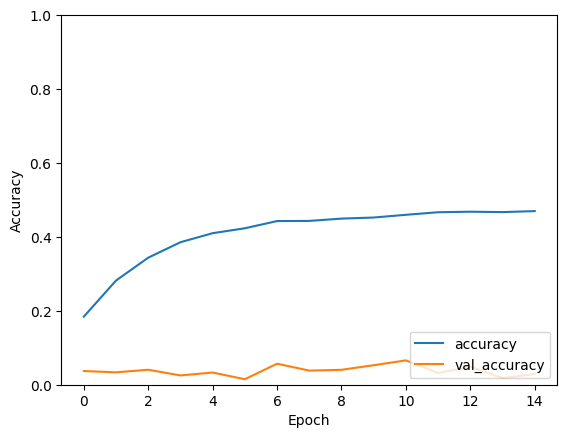

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_labels, verbose=2)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
#model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(27))

#model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(master, master_labels, epochs=15, 
                    validation_data=(test, test_labels))

Epoch 1/15
488/488 [==============================] - 411s 838ms/step - loss: 1.8822 - accuracy: 0.2937 - val_loss: 7.5869 - val_accuracy: 0.0082
Epoch 2/15
488/488 [==============================] - 185s 379ms/step - loss: 0.9782 - accuracy: 0.4412 - val_loss: 10.5923 - val_accuracy: 0.0288
Epoch 3/15
488/488 [==============================] - 186s 382ms/step - loss: 0.8102 - accuracy: 0.4674 - val_loss: 12.6438 - val_accuracy: 0.0582
Epoch 4/15
488/488 [==============================] - 184s 378ms/step - loss: 0.7629 - accuracy: 0.4808 - val_loss: 13.2929 - val_accuracy: 0.0655
Epoch 5/15
488/488 [==============================] - 184s 378ms/step - loss: 0.7528 - accuracy: 0.4847 - val_loss: 13.5129 - val_accuracy: 0.0131
Epoch 6/15
488/488 [==============================] - 184s 377ms/step - loss: 0.7405 - accuracy: 0.4775 - val_loss: 13.7637 - val_accuracy: 0.0038
Epoch 7/15
488/488 [==============================] - 185s 380ms/step - loss: 0.7343 - accuracy: 0.4903 - val_loss: 12.

In [6]:
model.save('model_initial_200_CNN_E15.h5')

In [9]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy', allow_pickle=True)[()]
    filt = ['accuracy'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None])
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [17]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
# Evaluate model
#score = model.evaluate(test,test_labels, verbose=0)
#print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model.predict(test)

244/244 [==============================] - 20s 81ms/step


In [31]:

print(y_pred)
print(test_labels)
print(np.where(test_labels > 0))
print('\n', sklearn.metrics.classification_report(np.where(test_labels > 0)[0], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plotKerasLearningCurve()
plt.show()
plot_learning_curve(history)
plt.show()
plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
plt.show()

[[-15.832945   10.067348   -4.7013693 ... -11.878807  -14.127191
  -16.747812 ]
 [-15.049987    9.285311   -3.5502627 ... -10.712573  -13.273638
  -16.258772 ]
 [-12.711755    7.9374113  -1.621275  ...  -8.84432   -11.892398
  -14.004453 ]
 ...
 [-15.233004   -6.4209056  -7.4289784 ...  -5.742517   -3.0013268
    9.853455 ]
 [-15.034156   -6.7297506  -7.2587247 ...  -5.17316    -1.9252778
    9.440396 ]
 [-14.531211   -6.566097   -6.4678984 ...  -4.583704   -2.127612
    9.145778 ]]
[ 1  1  1 ... 26 26 26]
(array([   0,    1,    2, ..., 7797, 7798, 7799], dtype=int64),)


ValueError: Number of classes, 7800, does not match size of target_names, 29. Try specifying the labels parameter

In [6]:
## Convert Image Size and save them

def convert_image_size_64(letter, start, end, step):
    path = "./ASL_Alphabet/asl_alphabet_train/asl_alphabet_train/"
    new_path = "./ASL_CSV_64/train/"

    for num in range(start, end, step):
        image = Image.open(path+letter+'/'+letter+str(num)+'.jpg')
        new_image = image.resize((64,64))
        new_image.save(new_path+letter+'/'+letter+str(num)+'.jpg')
        
    return 0


for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    convert_image_size_64(letter, 1, 3001, 1)